# Problem Statement

To predict the closing stock price using past 60 days stock price. using Artificial Recurrent neural network called LSTM

# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import math
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
plt.style.use('fivethirtyeight')



In [ ]:
df= pd.read_csv('IDFCFIRSTB.NS.csv')

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,11/6/2015,70.500000,73.400002,67.000000,70.400002,67.804970,22781516
1,11/9/2015,67.750000,68.000000,66.900002,66.949997,64.482140,10010231
2,11/10/2015,66.500000,66.500000,64.099998,64.550003,62.170612,10736961
3,11/13/2015,65.849998,65.849998,63.000000,63.500000,61.159309,6771668
4,11/16/2015,63.450001,65.500000,62.000000,65.000000,62.604019,5640610
...,...,...,...,...,...,...,...
1949,9/28/2023,97.650002,98.400002,93.650002,94.550003,94.550003,52996232
1950,9/29/2023,95.150002,95.900002,94.199997,95.500000,95.500000,21360102
1951,10/3/2023,95.650002,95.650002,93.550003,94.150002,94.150002,20336030
1952,10/4/2023,93.500000,93.500000,91.300003,91.750000,91.750000,47373997


In [ ]:
df.shape

(1954, 7)

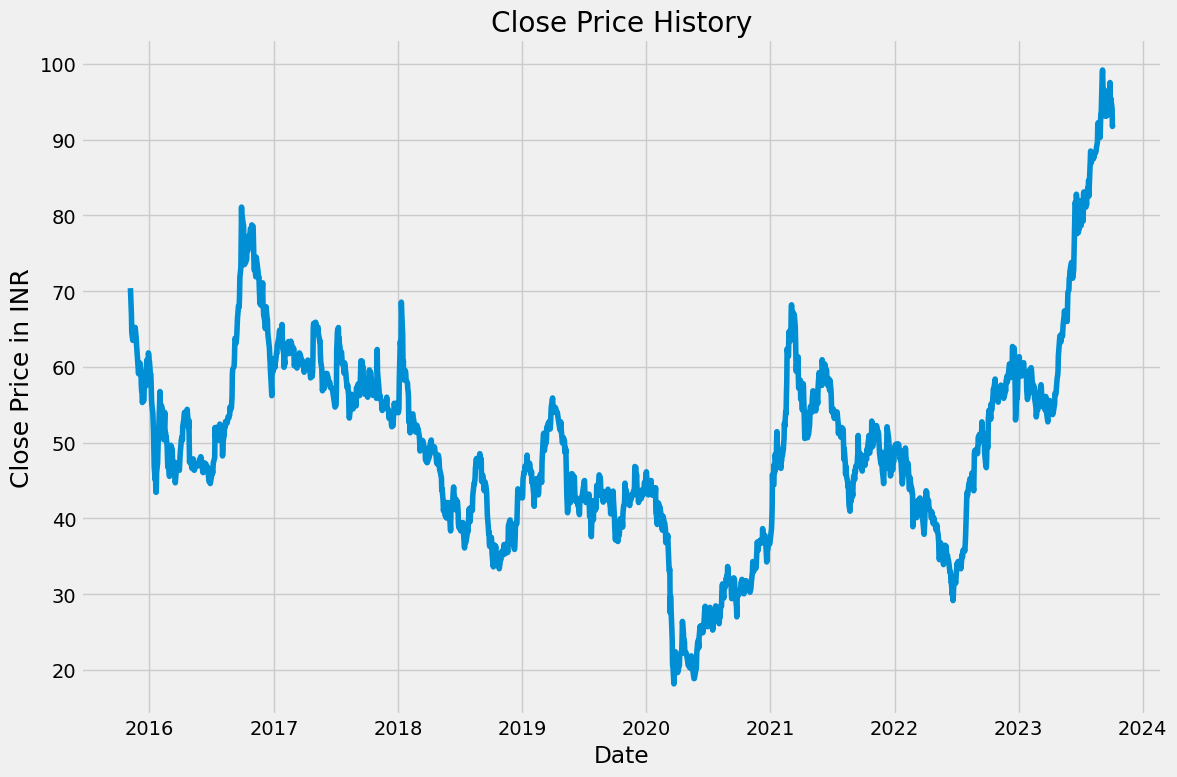

In [ ]:
#Visualise the close price
df['Date'] = pd.to_datetime(df['Date'], format="%m/%d/%Y")
df.set_index('Date', inplace=True)

plt.figure(figsize=(12,8))
plt.title('Close Price History')
plt.plot(df.index,df['Close'])

plt.xlabel('Date')
plt.ylabel('Close Price in INR', fontsize=18)

plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#create a new dataframe with close column
data = df.filter(['Close'])
#convert the dataframe to numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset)* 0.8)

In [ ]:
training_data_len

1564

In [ ]:
#scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.64466384],
       [0.60209746],
       [0.57248618],
       ...,
       [0.93769284],
       [0.90808146],
       [0.91054904]])

In [ ]:
#create a training dataset
train_data = scaled_data[0:training_data_len,:]
#Split the data into x_train and y_train dataset
x_train =[]
y_train =[]

for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i <= 61:
    print(x_train)
    print(y_train)
    print()


[array([0.64466384, 0.60209746, 0.57248618, 0.55953117, 0.57803827,
       0.57433681, 0.58050585, 0.56384947, 0.58050585, 0.56323258,
       0.55274525, 0.53670578, 0.52868602, 0.50524367, 0.51634795,
       0.52004936, 0.52313388, 0.52251698, 0.50956203, 0.48797042,
       0.47748303, 0.47748303, 0.45835904, 0.46391118, 0.46082667,
       0.46761259, 0.49228872, 0.49660708, 0.4848859 , 0.5077113 ,
       0.5077113 , 0.52745223, 0.51573106, 0.53917335, 0.53485505,
       0.52683528, 0.52498461, 0.503393  , 0.50400989, 0.48858731,
       0.46576192, 0.45589142, 0.44108579, 0.42196174, 0.40900679,
       0.37692785, 0.35410239, 0.33189389, 0.33806292, 0.31215302,
       0.31215302, 0.34423196, 0.35965454, 0.40037013, 0.40222087,
       0.42442937, 0.47624925, 0.44663787, 0.41887723, 0.43553365])]
[0.45404074475166245]

[array([0.64466384, 0.60209746, 0.57248618, 0.55953117, 0.57803827,
       0.57433681, 0.58050585, 0.56384947, 0.58050585, 0.56323258,
       0.55274525, 0.53670578, 0.52

In [ ]:
# convert x_train and y_train into a numpy arrays
x_train,y_train =np.array(x_train),np.array(y_train)

In [ ]:
#Reshape the data to feed the LSTM
x_train =np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1)) #rows,colums,no. of features
x_train.shape

(1504, 60, 1)

In [ ]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1))) # layer 1
model.add(LSTM(50,return_sequences=False)) # layer 2 without LSTM layer hence false
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
#compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1504/1504 [==============================] - 27s 17ms/step - loss: 0.0016


In [ ]:
#create a testing dataset
#create a new array containing the scaled values from index 1504 to 1954
test_data = scaled_data[training_data_len-60:, :]
#create the datasets x_test,y_test
x_test =[]
y_test =dataset[training_data_len:, :]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [ ]:
#convert the data into numpy array
x_test = np.array(x_test)

In [ ]:
#Reshape the data to feed the LSTM
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1)) #rows,colums,no. of features

In [ ]:
x_test.shape

(390, 60, 1)

In [ ]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions) #unscale the data

13/13 [==============================] - 1s 10ms/step


In [ ]:
#Get the Root mean squared error(RMSE)
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse


3.142001441444395

In [ ]:
#Plot the data
train= data[:training_data_len]
valid = data[training_data_len:]
valid['predictions'] = predictions

<ipython-input-152-452901630a1f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions'] = predictions


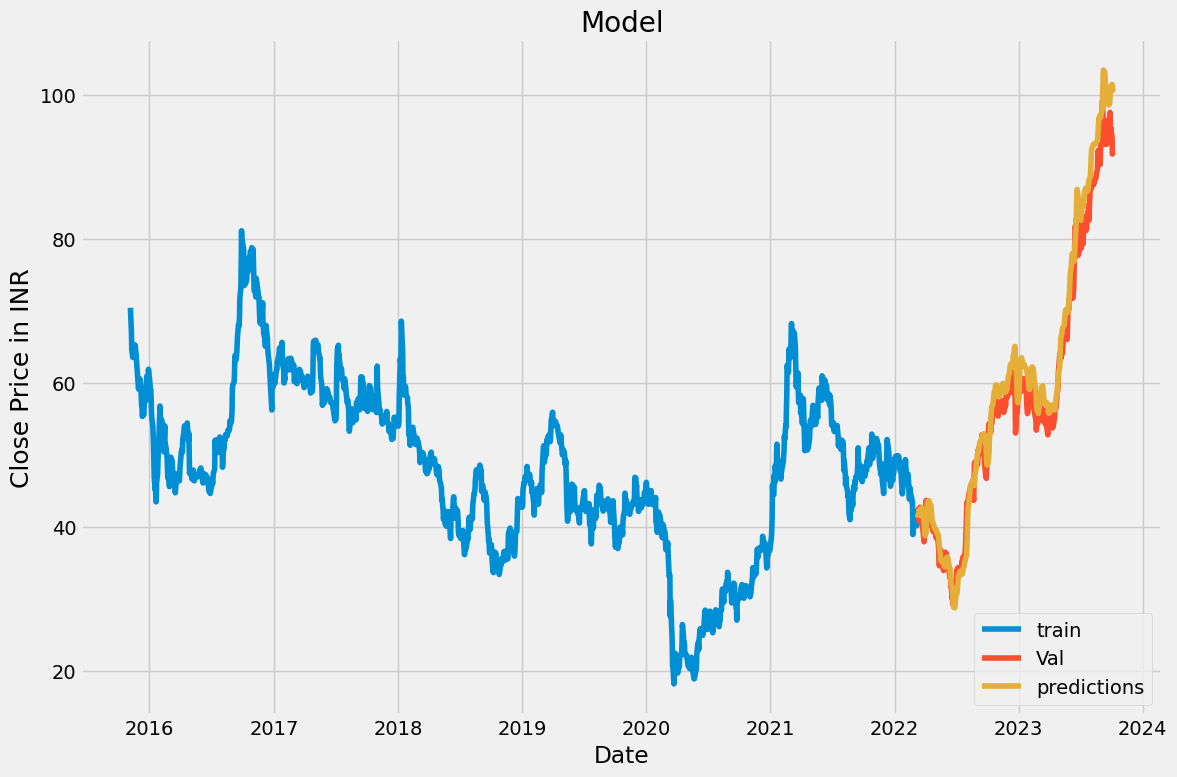

In [ ]:
#visualise
#df['Date'] = pd.to_datetime(df['Date'], format="%m/%d/%Y")

plt.figure(figsize=(12,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price in INR', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','predictions']])
plt.legend(['train','Val','predictions'], loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#Show the valid and predicted prices
valid

,Close,predictions
Date,,
2022-03-10,42.299999,41.233734
2022-03-11,42.400002,41.573776
2022-03-14,41.900002,42.001808
2022-03-15,40.700001,42.314217
2022-03-16,42.000000,42.284039
...,...,...
2023-09-28,94.550003,100.710182
2023-09-29,95.500000,101.152496
2023-10-03,94.150002,101.435905


In [ ]:
df_new=df['Close']
#Get the last 60 day closing price values and convert the dataframe to an array
last_60_days=df_new[-60:].values
last_60_days = last_60_days.reshape(-1, 1) #check
# Scale the data to be between 0 to 1
last_60_days_scaled = scaler.transform(last_60_days)
#create an empty list
x_test=[]
#Append the past 60 days
x_test.append(last_60_days_scaled)
#Convert the x_test dataset to a numpy array
x_test = np.array(x_test)
#Reshape the data
x_test=np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
#Get the predicted scaled price
pred_price =model.predict(x_test)
# Undo the scaling
pred_price=scaler.inverse_transform(pred_price)
print(pred_price)

1/1 [==============================] - 0s 17ms/step
[[99.24132]]
